<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**

##CS6462 - PROBABILISTIC AND EXPLAINABLE AI 
##SEM2 2021/2

###CS6462_Lab_4.6

###Instructor: Enrique Naredo

Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.

## [Classification](https://en.wikipedia.org/wiki/Statistical_classification)

In statistics, classification is the problem of identifying which of a set of categories (sub-populations) an observation (or observations) belongs to. 

Classification examples:
* assigning a given email to the "spam" or "non-spam" class, 
* assigning a diagnosis to a given patient (sex, blood pressure, presence or absence of certain symptoms, etc.)

An algorithm that implements classification, especially in a concrete implementation, is known as a classifier. 

* The term "classifier" sometimes also refers to the mathematical function, 
* implemented by a classification algorithm, that maps input data to a category. 

### Example-6

**Real-world dataset**

In [ ]:
# import libraries
from sklearn.ensemble import GradientBoostingClassifier
from pandas import DataFrame
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn import datasets

# Loading some example data
iris = datasets.load_iris()

# Slice features to only contain 2
# to show the 2D decision boundary
# you could use any of these combinations
# [0, 1], [0, 2], [0, 3],[1, 2], [1, 3], [2, 3]
X2 = iris.data[:, [0, 2]]
y2 = iris.target

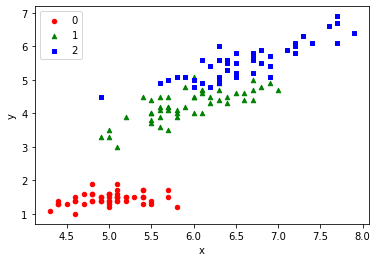

In [ ]:
# create a data frame
df2 = DataFrame(dict(x=X2[:,0], y=X2[:,1], label=y2))
# three classes
colors = {0:'red', 1:'green', 2:'blue'}
markers = {0:'o', 1:'^', 2:'s'}
# figure
fig, ax = plt.subplots()
grouped = df2.groupby('label')
# scatter plot
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', 
    label=key, color=colors[key], marker=markers[key])
# show the plot
plt.show();

In [ ]:
# show first n rows (default 5)
df2.head()

,x,y,label
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [ ]:
# show statistics
df2.describe()

,x,y,label
count,150.000000,150.000000,150.000000
mean,5.843333,3.758000,1.000000
std,0.828066,1.765298,0.819232
min,4.300000,1.000000,0.000000
25%,5.100000,1.600000,0.000000
50%,5.800000,4.350000,1.000000
75%,6.400000,5.100000,2.000000
max,7.900000,6.900000,2.000000


In [ ]:
# count the data elements for each class
df2['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

###Training & Test Data

In [ ]:
from sklearn.model_selection import train_test_split

# training: 80% (0.8), test: 20% (0.2)
X_train,X_test,y_train,y_test = train_test_split(X2, y2, test_size=0.2)

**Training set**

In [ ]:
# training 
X_train[0:10]

array([[5. , 1.5],
       [4.8, 1.4],
       [5.6, 4.1],
       [5.7, 1.5],
       [5.5, 1.4],
       [5.9, 5.1],
       [5. , 1.2],
       [6.7, 5.6],
       [4.9, 3.3],
       [5.5, 4.4]])

In [ ]:
# training 
y_train[0:10]

array([0, 0, 1, 0, 0, 2, 0, 2, 1, 1])

**Test set**

In [ ]:
X_test[0:10]

array([[4.8, 1.6],
       [5.5, 4. ],
       [5.4, 1.7],
       [4.5, 1.3],
       [6.5, 5.5],
       [6.1, 4.7],
       [7.7, 6.1],
       [6.4, 5.6],
       [4.7, 1.6],
       [7.7, 6.9]])

In [ ]:
y_test[0:10]

array([0, 1, 0, 0, 2, 1, 2, 2, 0, 2])

[**Gradient boosting**](https://en.wikipedia.org/wiki/Gradient_boosting)

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. 

* It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.

* When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest.

* A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function

In [ ]:
# Gradient Boosting Classifier model
GBC_model = GradientBoostingClassifier()

In [ ]:
# fit to data a Logistic Regresion model
GBC_model.fit(X_train, y_train)

GradientBoostingClassifier()

**[Decision boundary](https://en.wikipedia.org/wiki/Decision_boundary)**

* A decision boundary is the region of a problem space in which the output label of a classifier is ambiguous.

* If the decision surface is a hyperplane, then the classification problem is linear, and the classes are linearly separable.

* In a statistical-classification problem with two classes, a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two sets, one for each class.

* You can find a related information to this topic in this [publication](https://towardsdatascience.com/classification-problems-and-exploring-decision-boundaries-3317e03afcdb).

**Note**: The code used allows us to use a 2D dimensional space to show the decision boundary. Be aware that in this example we are using 2 features (2D). 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


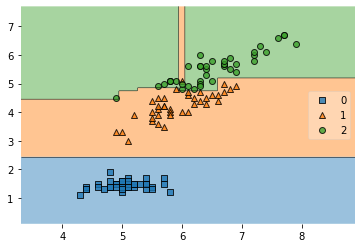

In [ ]:
# Plotting the decision boundary 
plot_decision_regions(X_train, y_train, clf=GBC_model, legend=7);

###Exercise-12

In this exercise, you will create a new dataset to test your model, you need to add or modify the code in the following cells, here you have some highlight and hints to solve this exercise:
* Add the missing parts of the code;
* compare it against the example;
* use different var names, for instance; fig2, ax2, etc;
* use different colors for the dots;
* use different shapes for the marks
* show the predictions on the new dataset;
* verify if the given label is correct;
* give the percentage of correct classiffied data points.

In [ ]:
# make predictions (assign class labels)
y_pred = GBC_model(X_test)
# show the inputs and predicted outputs
for k in range(X_test):
	#print("X=%s, Class Predicted = %s" % (X_test[i], y_pred[i]))
  print("X{0} = {1}, Class Predicted = {2}".format(i, X_test, y_pred))

In [ ]:
# create a data frame
df_new = DataFrame(dict(x=X_test, y=X_test, y_pred))

In [ ]:
# show 10 rows 
df_new.head()

In [ ]:
# three classes
colors2 = orange,brown,cyan
# figure
fig2, ax2 = subplots()
# new data
grouped2 = df_new.group('label')
# scatter plot
for key2, group2 in grouped:
    group2.plot(ax=ax2, kind='scatter', x='x', y='y', label, color=colors2)
# show the plot
plt.show();

In [ ]:
# Plotting the new decision boundary 
# from the LogisticRegression model
plot_regions(X_test, y_pred, GBC_model, legend=18)